In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import  adfuller, arma_order_select_ic
import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pmd



In [2]:
import sys
import os
# sys.path.insert(1, "../WalmartSales/src/utils")
sys.path.append("../src/utils")

from eda_tools import *


In [3]:
df = pd.read_csv("../walmart_sales/train_region_v2.csv")

df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
df=df.rename(columns={"Weekly_Sales": "sales", "Date": "date", "Region":'region'})


df.head()

,region,date,sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [4]:
adfuller(df["sales"])

(-2.9565643873079934,
 0.039154688688902435,
 14,
 1701,
 {'1%': -3.4342002032721437,
  '5%': -2.8632406484200064,
  '10%': -2.5676753800009053},
 45792.47988346714)

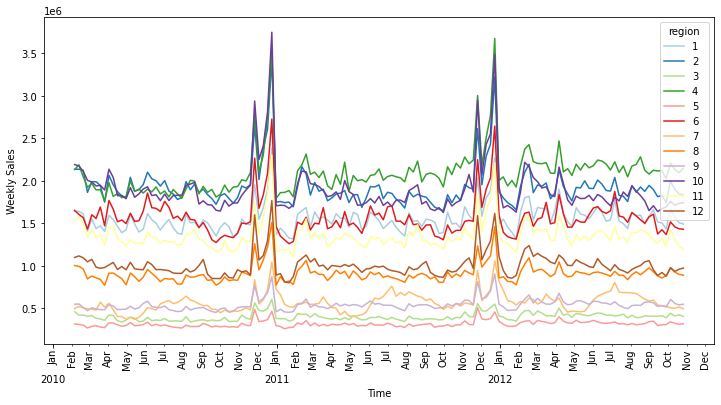

In [5]:
# adfuller_test(df["sales"])

plot_timeseries_complex("region", "sales", df, "date")

In [6]:
adfuller_test(df['sales'])

ADF Test Statistic : -2.9565643873079934
p-value : 0.039154688688902435
#Lags Used : 14
Number of Observations : 1701
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [7]:
region1 = df.loc[df["region"]==1, ]

/Users/daniel/opt/anaconda3/envs/walmart2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/daniel/opt/anaconda3/envs/walmart2/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


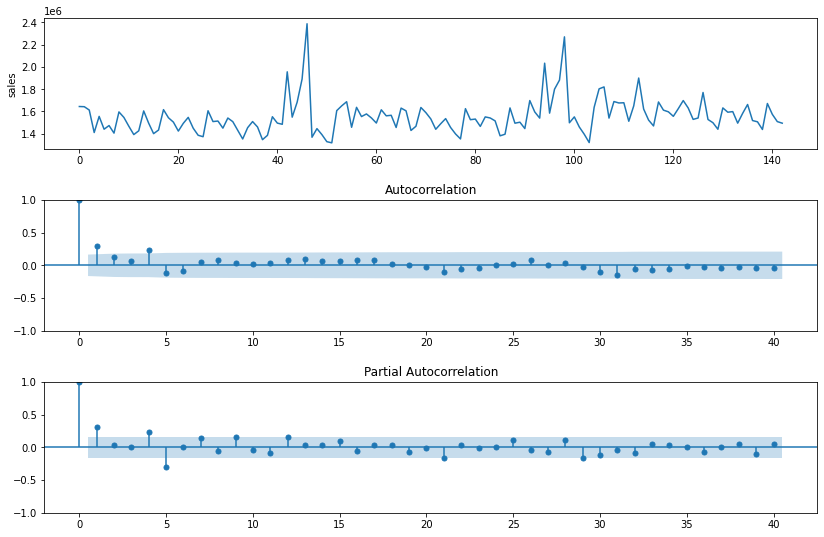

In [8]:
plot_timeseries_analysis(region1["sales"])

In [9]:
adfuller_test(region1["sales"])

ADF Test Statistic : -5.102186145192287
p-value : 1.3877788330759535e-05
#Lags Used : 4
Number of Observations : 138
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


## ARIMA Model

In [93]:
region1["sales"].values

array([1643690.9 , 1641957.44, 1611968.17, 1409727.59, 1554806.68,
       1439541.59, 1472515.79, 1404429.92, 1594968.28, 1545418.53,
       1466058.28, 1391256.12, 1425100.71, 1603955.12, 1494251.5 ,
       1399662.07, 1432069.95, 1615524.71, 1542561.09, 1503284.06,
       1422711.6 , 1492418.14, 1546074.18, 1448938.92, 1385065.2 ,
       1371986.6 , 1605491.78, 1508237.76, 1513080.49, 1449142.92,
       1540163.53, 1507460.69, 1430378.67, 1351791.03, 1453329.5 ,
       1508239.93, 1459409.1 , 1345454.  , 1384209.22, 1551659.28,
       1494479.49, 1483784.18, 1955624.11, 1548033.78, 1682614.26,
       1891034.93, 2387950.2 , 1367320.01, 1444732.28, 1391013.96,
       1327405.42, 1316899.31, 1606629.58, 1649614.93, 1686842.78,
       1456800.28, 1636263.41, 1553191.63, 1576818.06, 1541102.38,
       1495064.75, 1614259.35, 1559889.  , 1564819.81, 1455090.69,
       1629391.28, 1604775.58, 1428218.27, 1466046.67, 1635078.41,
       1588948.32, 1532114.86, 1438830.15, 1488538.09, 1534849

In [139]:
# For non-seasonal data

model1 = ARIMA(region1["sales"].values, order=(3,0,4))
model1_fit = model1.fit()
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -1890.132
Date:                Mon, 13 Dec 2021   AIC                           3798.264
Time:                        12:01:18   BIC                           3824.930
Sample:                             0   HQIC                          3809.100
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.555e+06   2.47e+04     62.858      0.000    1.51e+06     1.6e+06
ar.L1         -0.2556      0.177     -1.446      0.148      -0.602       0.091
ar.L2         -0.4566      0.210     -2.175      0.030      -0.868      -0.045
ar.L3         -0.2083      0.163     -1.279      0.201      -0.527       0.111
ma.L1          0.6518      0.162      4.011      0.000       0.333       0.970
ma.L2          0.7576      0.219      3.457      0.001       0.328       1.187
ma.L3          0.4076      0.218      1.868      0.062      -0.020       0.835
ma.L4          0.5629      0.105      5.385      0.000       0.358       0.768
sigma2      1.935e+10      0.171   1.13e+11      0.000    1.93e+10    1.93e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                82.28
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             1.14
Prob(H) (two-sided):                  0.38   Kurtosis:                         5.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+26. Standard errors may be unstable.
"""

In [140]:
pred1 =  model1_fit.predict(start=0, end=len(region1) + 40)
pred1_2 = model1_fit.predict(period=200)
pred1_3 = model1_fit.forecast(steps=20)

<AxesSubplot:>

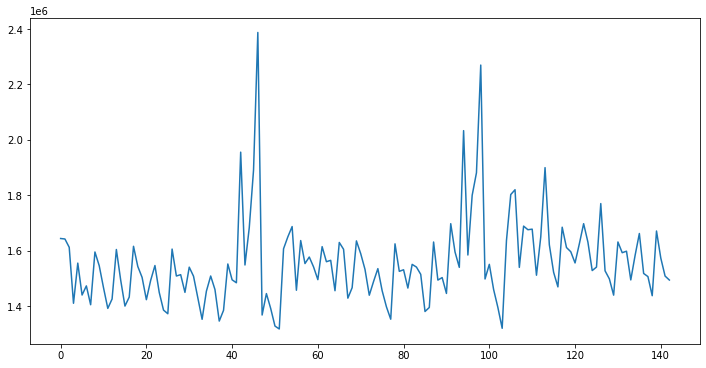

In [10]:
plt.figure(figsize=(12,6))
region1["sales"].plot()

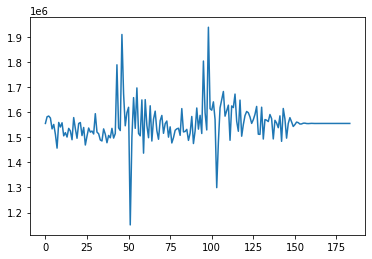

In [142]:
plt.plot(pred1)

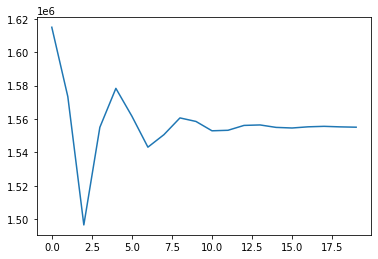

In [143]:
plt.plot(pred1_3)

In [145]:
region1["sales"]

0      1643690.90
1      1641957.44
2      1611968.17
3      1409727.59
4      1554806.68
          ...    
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Name: sales, Length: 143, dtype: float64

In [152]:
np.arange(start=region1.index[-1], stop=region1.index[-1]+40)

array([142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181])

In [159]:
pd.Series(region1["sales"].values)

0      1643690.90
1      1641957.44
2      1611968.17
3      1409727.59
4      1554806.68
          ...    
138    1437059.26
139    1670785.97
140    1573072.81
141    1508068.77
142    1493659.74
Length: 143, dtype: float64

In [155]:
pred_series = pd.Series(pred1_3, index=np.arange(start=region1.index[-1], stop=region1.index[-1]+20))

In [169]:
def plot_forecast(train, forecast, test=None, full_series = False):
    if not full_series:
        train = pd.Series(train)
        index_start = train.index[-1] + 1
        pred_series = pd.Series(forecast, index=np.arange(start=index_start, stop=index_start + len(forecast)))
    else:
        pred_series = pd.Series(forecast)

    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    if test:
        plt.plot(test, label='actual')
    
    plt.plot(pred_series, label='forecast')
    # plt.fill_between(lower_series.index, lower_series, upper_series, 
    #                  color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

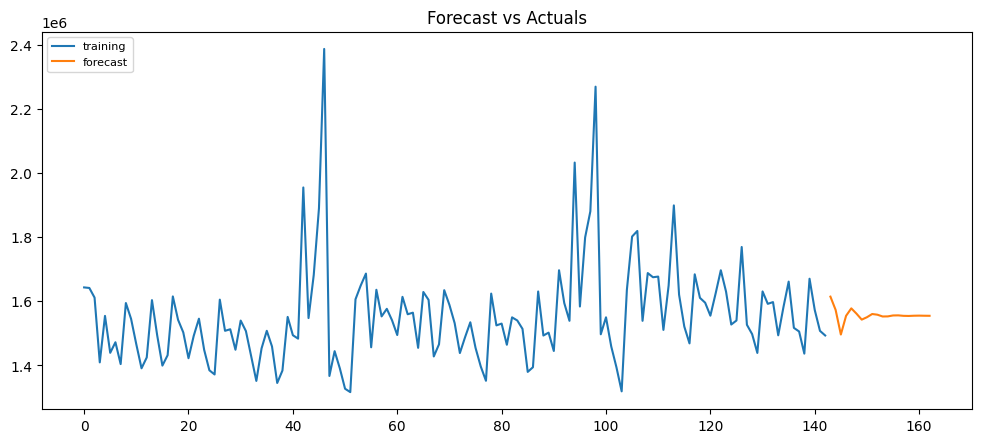

In [170]:
plot_forecast(region1["sales"], pred1_3)

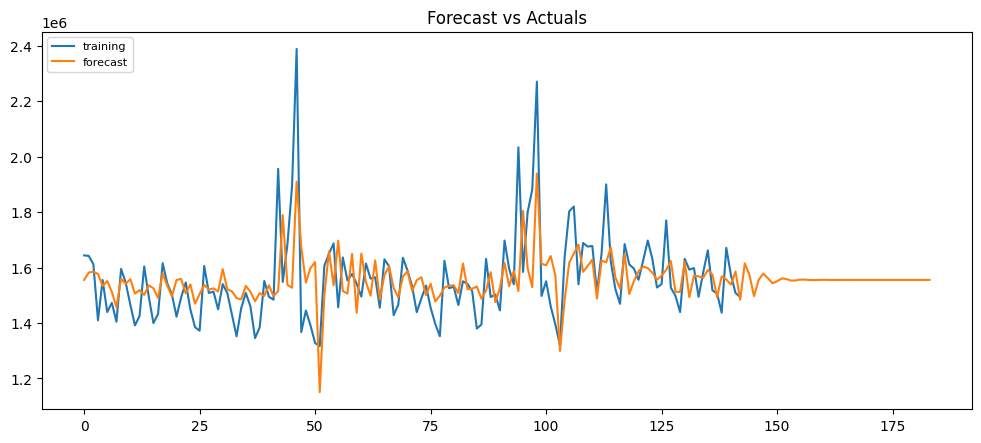

In [171]:
plot_forecast(region1["sales"], pred1, full_series=True)

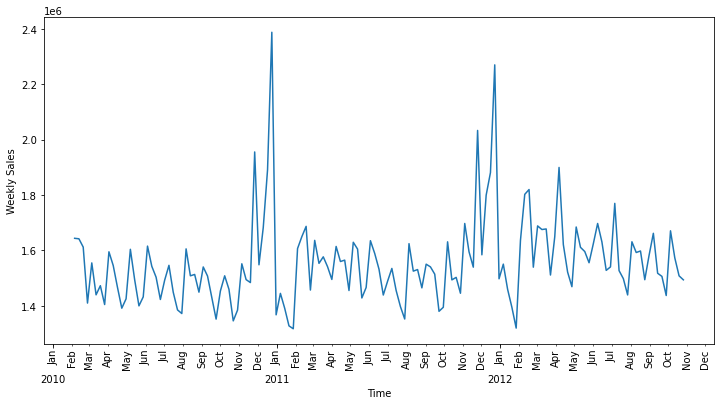

In [208]:
plot_timeseries(region1["sales"], date=region1["date"])

### Auto ARIMA

In [ ]:
split = 0.2
y_train = region1.iloc[:-(int(0.2*len(region1))), :]
y_test = region1.iloc[-(int(0.2*len(region1))):, :]

### Non-seasonal ARIMA

In [72]:
model1 = pmd.auto_arima(y_train["sales"].values, 
    start_p=1, start_q = 1,
    max_p=7, max_d=7, max_q=7,
    seasonal = False, stepwise = True,
    trace=True, 
    n_fits = 50
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3083.972, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3107.687, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3098.667, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3093.559, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3105.692, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3085.884, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3086.690, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3097.111, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3083.832, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3084.700, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3077.876, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3078.230, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3

In [74]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1531.938
Date:                Mon, 13 Dec 2021   AIC                           3077.876
Time:                        16:40:58   BIC                           3097.030
Sample:                             0   HQIC                          3085.650
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5370.8310   2493.784      2.154      0.031     483.104    1.03e+04
ar.L1         -0.7500      0.142     -5.278      0.000      -1.028      -0.471
ar.L2         -0.3056      0.160     -1.909      0.056      -0.619       0.008
ma.L1          0.1977      0.139      1.424      0.154      -0.074       0.470
ma.L2         -0.4528      0.160     -2.827      0.005      -0.767      -0.139
ma.L3         -0.7086      0.099     -7.167      0.000      -0.902      -0.515
sigma2      2.886e+10      0.000   1.05e+14      0.000    2.89e+10    2.89e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                22.56
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             0.85
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.18e+29. Standard errors may be unstable.
"""

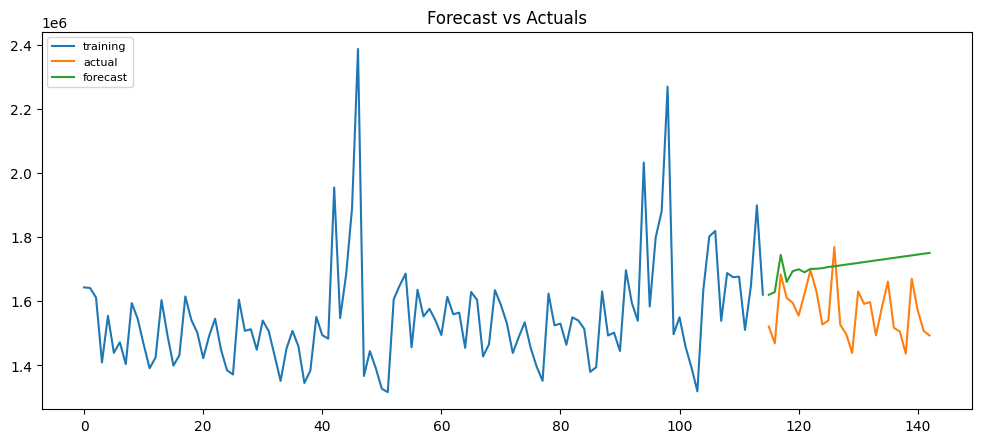

In [76]:
pred1 = model1.predict(n_periods=len(y_test))
plot_forecast(y_train["sales"], pred1, y_test["sales"])

In [89]:
result1 = evaluate_model(y_test["sales"], pred1)

In [42]:
print(int(0.2*len(region1)))

28


### Seasonal ARIMA

In [94]:
model2 = pmd.auto_arima(y_train["sales"].values, 
    start_p=1, start_q = 1,
    max_p=7, max_d=7, max_q=7,
    start_P=0, D=1, start_Q=0, 
    max_P = 7, max_Q = 7, m=12, 
    seasonal = True, stepwise = True,
    trace=True, 
    n_fits = 50
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2842.402, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2842.298, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2831.914, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2832.557, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2841.441, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2840.700, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2832.847, Time=0.57 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2832.522, Time=0.21 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2830.751, Time=0.27 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=2832.709, Time=0.45 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2837.391, Time=0.07 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=2832.409, Time=0.34 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2830.222, Time=0.26 sec
 ARIMA(1,0,1)(1,1,1)[12]

In [95]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1404.312
Date:                            Mon, 13 Dec 2021   AIC                           2818.624
Time:                                    16:49:35   BIC                           2831.798
Sample:                                         0   HQIC                          2823.960
                                            - 115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2351      0.097     12.727      0.000       1.045       1.425
ar.L2         -0.2497      0.095     -2.628      0.009      -0.436      -0.063
ma.L1         -0.9047      0.030    -29.942      0.000      -0.964      -0.845
ma.S.L12      -0.6851      0.138     -4.952      0.000      -0.956      -0.414
sigma2      5.173e+10   1.14e-12   4.54e+22      0.000    5.17e+10    5.17e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                24.00
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.84
Prob(H) (two-sided):                  0.86   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.51e+38. Standard errors may be unstable.
"""

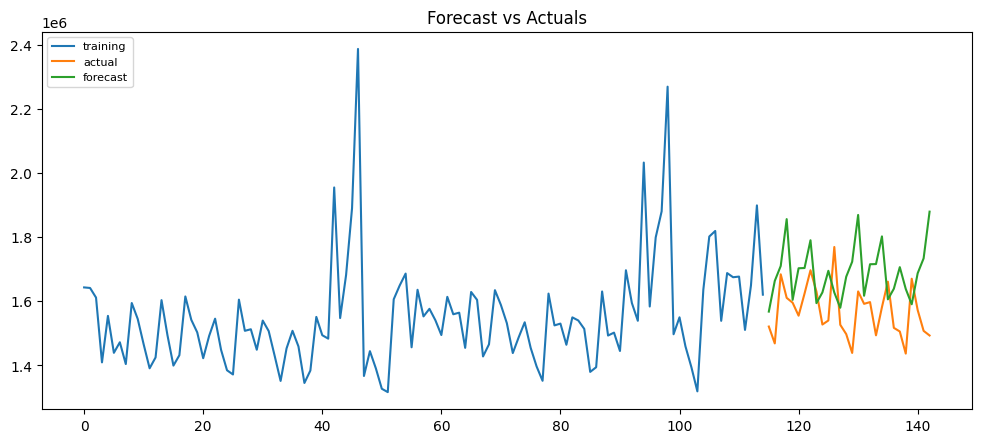

In [96]:
# pred2 = model2.predict(n_periods=20)
pred2 = model2.predict(n_periods=len(y_test))
plot_forecast(y_train["sales"], pred2, y_test["sales"])

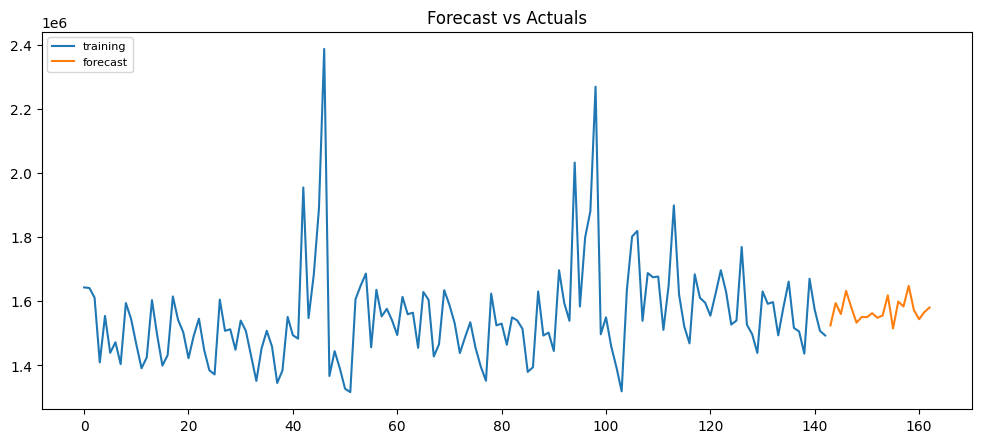

In [25]:
plot_forecast(region1["sales"], pred2)

In [26]:
pred2

array([1524784.7111205 , 1594725.15880002, 1560599.27249194,
       1633212.26302361, 1581209.75624458, 1533685.5675313 ,
       1551377.16245566, 1550893.55530916, 1563176.64262597,
       1548896.78428027, 1555844.67754382, 1619105.4670113 ,
       1515482.22988121, 1599451.29755767, 1584312.42377798,
       1648469.32913834, 1572645.14211833, 1544508.38567749,
       1566638.080493  , 1580915.24965719])

In [97]:
result2 = evaluate_model(y_test["sales"], pred2)

In [52]:
model3 = pmd.auto_arima(y_train["sales"].values, 
    start_p=1, start_q = 1,
    max_p=7, max_d=7, max_q=7,
    start_P=0, D=1, start_Q=0, 
    max_P = 7, max_Q = 7, m=12, 
    seasonal = True, stepwise = True,
    trace=True, 
    n_fits = 50
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2842.402, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2842.298, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2831.914, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2832.557, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2841.441, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2840.700, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2832.847, Time=0.55 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2832.522, Time=0.23 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2830.751, Time=0.27 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=2832.709, Time=0.46 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2837.391, Time=0.06 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=2832.409, Time=0.31 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2830.222, Time=0.24 sec
 ARIMA(1,0,1)(1,1,1)[12]

In [53]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1404.312
Date:                            Mon, 13 Dec 2021   AIC                           2818.624
Time:                                    16:27:58   BIC                           2831.798
Sample:                                         0   HQIC                          2823.960
                                            - 115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2351      0.097     12.727      0.000       1.045       1.425
ar.L2         -0.2497      0.095     -2.628      0.009      -0.436      -0.063
ma.L1         -0.9047      0.030    -29.942      0.000      -0.964      -0.845
ma.S.L12      -0.6851      0.138     -4.952      0.000      -0.956      -0.414
sigma2      5.173e+10   1.14e-12   4.54e+22      0.000    5.17e+10    5.17e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                24.00
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.84
Prob(H) (two-sided):                  0.86   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.51e+38. Standard errors may be unstable.
"""

In [56]:
pred3 = model3.predict(n_periods=len(y_test))

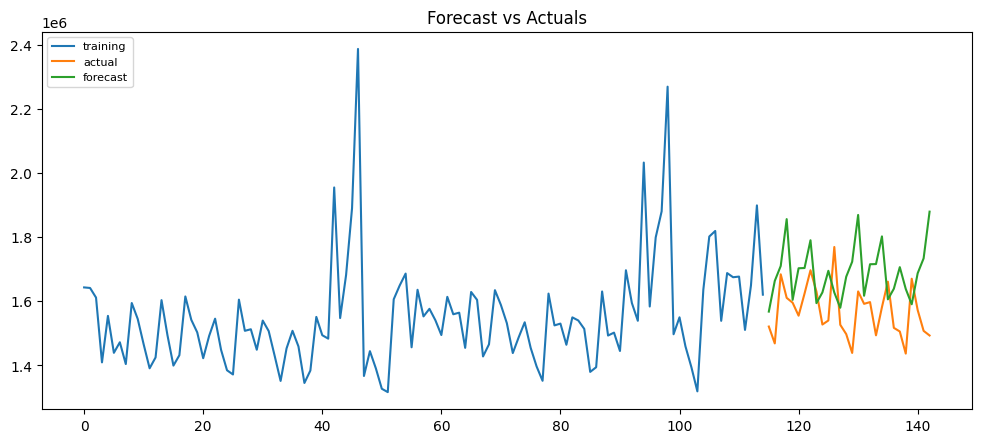

In [63]:
plot_forecast(y_train["sales"], pred3, y_test["sales"])

In [98]:
result3 = evaluate_model(y_test["sales"], pred3)

## Evaluate Model

In [67]:
sys.path.append("../src/utils")
from evaluate_model import *

In [70]:
print_evaluate_model(y_test["sales"].values, pred3)

Mean Absolute Error: 143098.06469451592
Mean Squared Error: 28529831521.70356
Root Mean Squared Error: 168907.76039514455
Mean Percentage Error: -7.971594251687926
Mean Absolute Percentage Error: 9.281466203760482


In [99]:
result = pd.concat([result1, result2, result3], axis=0)

In [102]:
result

,MSE,RMSE,MPE,MAPE
0,2.785080e+10,166885.596978,-9.417641,9.661360
0,2.852983e+10,168907.760395,-7.971594,9.281466
0,2.852983e+10,168907.760395,-7.971594,9.281466


In [104]:
result.set_index(pd.Series(["Non-seasonal ARIMA", "Seasonal ARIMA", "Seasonal Model3"]))

,MSE,RMSE,MPE,MAPE
Non-seasonal ARIMA,2.785080e+10,166885.596978,-9.417641,9.661360
Seasonal ARIMA,2.852983e+10,168907.760395,-7.971594,9.281466
Seasonal Model3,2.852983e+10,168907.760395,-7.971594,9.281466
